In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt


    

In [33]:
# Toplam ürün sayısı
toplam_urun_sayisi = 100

# Her sayfada kaç ürün olduğu
sayfa_basina_urun = 20

# Toplam kaç sayfa dolaşılacağı
toplam_sayfa_sayisi = (toplam_urun_sayisi - 1) // sayfa_basina_urun + 1

# Tüm ürün fiyatlarını tutacak liste
fiyat_listesi = []


In [35]:

fiyat_listesi = []

# Her sayfayı dolaşma
for sayfa_numarasi in range(1, toplam_sayfa_sayisi + 1):
    adres = f'https://www.trendyol.com/cok-satanlar?type=bestSeller&webGenderId=1&page={sayfa_numarasi}'
    baslik = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}
    sayfa = requests.get(adres, headers=baslik)
    soup = bs(sayfa.content, features='lxml')

    # Fiyat verilerini alma
    fiyatlar = soup.find_all('div', {'class': 'prc-box-dscntd'})
    


    
    # Fiyatları bir listeye ekleyerek DataFrame oluşturma
    for fiyat in fiyatlar:
        fiyat_text = fiyat.text.strip().replace(",", "").replace("TL", "").replace(" ", "")  # Virgül, TL ve boşlukları temizle
        try:
            fiyat_float = float(fiyat_text)
            # Fiyatı doğru formatta göstermek için 100'e bölerek düzeltme yapabiliriz.
            fiyat_listesi.append(fiyat_float / 100)
        except ValueError:
            print("Hata: Fiyat dönüştürülemedi:", fiyat_text)

        # Toplam 100 ürüne ulaşıldıysa döngüyü sonlandır
        if len(fiyat_listesi) >= toplam_urun_sayisi:
            break

# Verileri kontrol etmek için fiyat listesini yazdır
print(fiyat_listesi)


 



[49.89, 59.9, 1.91, 35.35, 199.99, 1.24, 2.79, 1.24, 110.9, 1.24, 88.38, 64.89, 49.8, 53.5, 2.74, 59.89, 0.8, 0.0286388, 49.83, 239.28, 49.89, 59.9, 1.91, 35.35, 199.99, 1.24, 2.79, 1.24, 110.9, 1.24, 88.38, 64.89, 49.8, 53.5, 2.74, 59.89, 0.8, 0.0286388, 49.83, 239.28, 49.89, 59.9, 1.91, 35.35, 199.99, 1.24, 2.79, 1.24, 110.9, 1.24, 88.38, 64.89, 49.8, 53.5, 2.74, 59.89, 0.8, 0.0286388, 49.83, 239.28, 49.89, 59.9, 1.91, 35.35, 199.99, 1.24, 2.79, 1.24, 110.9, 1.24, 88.38, 64.89, 49.8, 53.5, 2.74, 59.89, 0.8, 0.0286388, 49.83, 239.28, 49.89, 59.9, 1.91, 35.35, 199.99, 1.24, 2.79, 1.24, 110.9, 1.24, 88.38, 64.89, 49.8, 53.5, 2.74, 59.89, 0.8, 0.0286388, 49.83, 239.28]


In [36]:


puan_listesi = []
# Her sayfayı dolaşma
for sayfa_numarasi in range(1, toplam_sayfa_sayisi + 1):
    adres = f'https://www.trendyol.com/cok-satanlar?type=bestSeller&webGenderId=1&page={sayfa_numarasi}'
    baslik = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}
    sayfa = requests.get(adres, headers=baslik)
    soup = bs(sayfa.content, features='lxml')

    

    #Puan verilerini alma
    puan= soup.find_all('div',{'class':'ratings'})



# Puanları bir listeye ekleyerek DataFrame oluşturma
    for puan in puanlar:
        puan_text = puan.text.strip().replace(",", "").replace("TL", "").replace(" ", "").replace("(", "").replace(")", "") # Virgül, TL ve boşlukları temizle
        try:
            puan_float = float(puan_text)
            # Fiyatı doğru formatta göstermek için 100'e bölerek düzeltme yapabiliriz.
            puan_listesi.append(puan_float )
        except ValueError:
            print(puan_text)

        # Toplam 100 ürüne ulaşıldıysa döngüyü sonlandır
        if len(puan_listesi) >= toplam_urun_sayisi:
            break

# Verileri kontrol etmek için fiyat listesini yazdır
print(puan_listesi)


[731.0, 6875.0, 416.0, 1641.0, 538.0, 1179.0, 2941.0, 1394.0, 4665.0, 669.0, 1190.0, 19188.0, 5449.0, 1048.0, 488.0, 389.0, 7924.0, 7480.0, 4972.0, 6925.0, 731.0, 6875.0, 416.0, 1641.0, 538.0, 1179.0, 2941.0, 1394.0, 4665.0, 669.0, 1190.0, 19188.0, 5449.0, 1048.0, 488.0, 389.0, 7924.0, 7480.0, 4972.0, 6925.0, 731.0, 6875.0, 416.0, 1641.0, 538.0, 1179.0, 2941.0, 1394.0, 4665.0, 669.0, 1190.0, 19188.0, 5449.0, 1048.0, 488.0, 389.0, 7924.0, 7480.0, 4972.0, 6925.0, 731.0, 6875.0, 416.0, 1641.0, 538.0, 1179.0, 2941.0, 1394.0, 4665.0, 669.0, 1190.0, 19188.0, 5449.0, 1048.0, 488.0, 389.0, 7924.0, 7480.0, 4972.0, 6925.0, 731.0, 6875.0, 416.0, 1641.0, 538.0, 1179.0, 2941.0, 1394.0, 4665.0, 669.0, 1190.0, 19188.0, 5449.0, 1048.0, 488.0, 389.0, 7924.0, 7480.0, 4972.0, 6925.0]


In [41]:
# DataFrame oluşturma
df_fiyat= pd.DataFrame(fiyat_listesi, columns=['Fiyat'])

# Veriyi inceleme
print(df_fiyat)

         Fiyat
0    49.890000
1    59.900000
2     1.910000
3    35.350000
4   199.990000
..         ...
95   59.890000
96    0.800000
97    0.028639
98   49.830000
99  239.280000

[100 rows x 1 columns]


In [42]:
# DataFrame oluşturma
df_puan= pd.DataFrame(puan_listesi, columns=['Puan'])

# Veriyi inceleme
print(df_puan)

      Puan
0    731.0
1   6875.0
2    416.0
3   1641.0
4    538.0
..     ...
95   389.0
96  7924.0
97  7480.0
98  4972.0
99  6925.0

[100 rows x 1 columns]


In [43]:
# Ortalama fiyatı hesaplama
ortalama_fiyat = df_fiyat['Fiyat'].mean()
print("Ortalama Fiyat:", ortalama_fiyat)

Ortalama Fiyat: 53.67943194


In [44]:
# En yüksek ve en düşük fiyatları bulma
en_yuksek_fiyat = df_fiyat['Fiyat'].max()
en_dusuk_fiyat = df_fiyat['Fiyat'].min()

print("En Yüksek Fiyat:", en_yuksek_fiyat)
print("En Düşük Fiyat:", en_dusuk_fiyat)

En Yüksek Fiyat: 239.28
En Düşük Fiyat: 0.0286388


In [45]:
fiyat_araliklari = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 2000, 3000, 4000, 5000]
fiyat_aralik_isimleri = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299', '300-349', '350-399', '400-449', '450-499', '500-999', '1000-1999', '2000-2999', '3000-3999', '4000-4999']


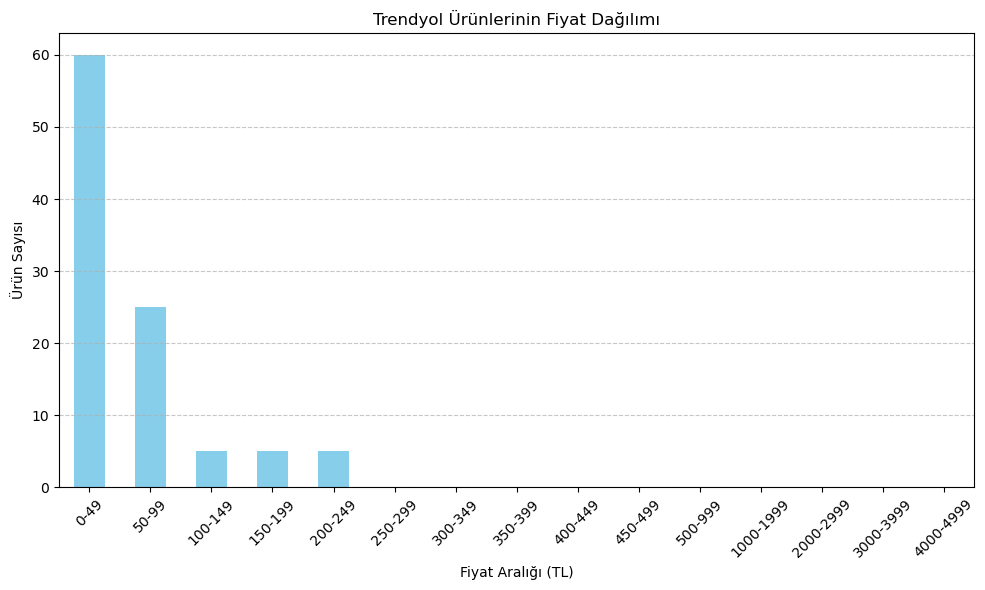

In [47]:
df['Fiyat Aralığı'] = pd.cut(df_fiyat['Fiyat'], bins=fiyat_araliklari, labels=fiyat_aralik_isimleri, right=False)
fiyat_dagilimi = df['Fiyat Aralığı'].value_counts().sort_index()

# Fiyat dağılımını görselleştirme
plt.figure(figsize=(10, 6))
fiyat_dagilimi.plot(kind='bar', color='skyblue')
plt.title('Trendyol Ürünlerinin Fiyat Dağılımı')
plt.xlabel('Fiyat Aralığı (TL)')
plt.ylabel('Ürün Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


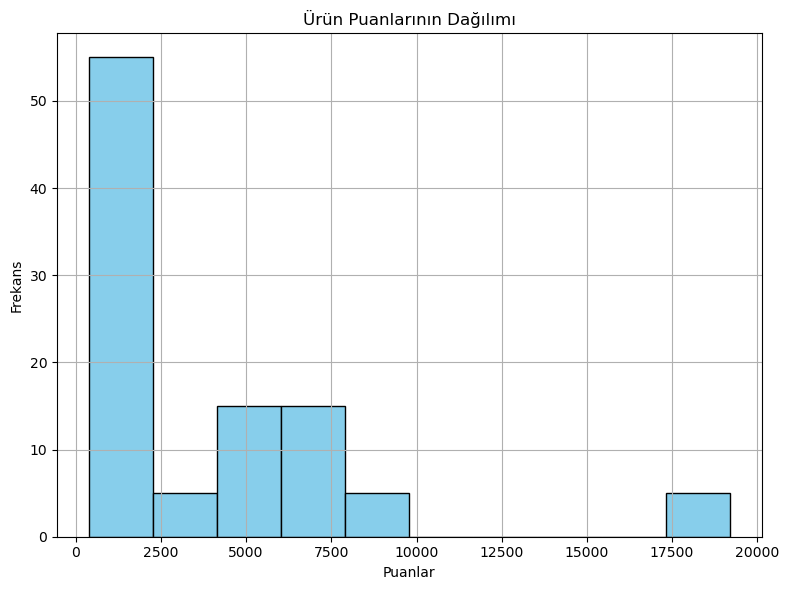

In [50]:

import matplotlib.pyplot as plt


# Histogram oluşturma
plt.figure(figsize=(8, 6))
plt.hist(df_puan, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Puanlar')
plt.ylabel('Frekans')
plt.title('Ürün Puanlarının Dağılımı')
plt.grid(True)
plt.tight_layout()

# Grafik gösterme
plt.show()

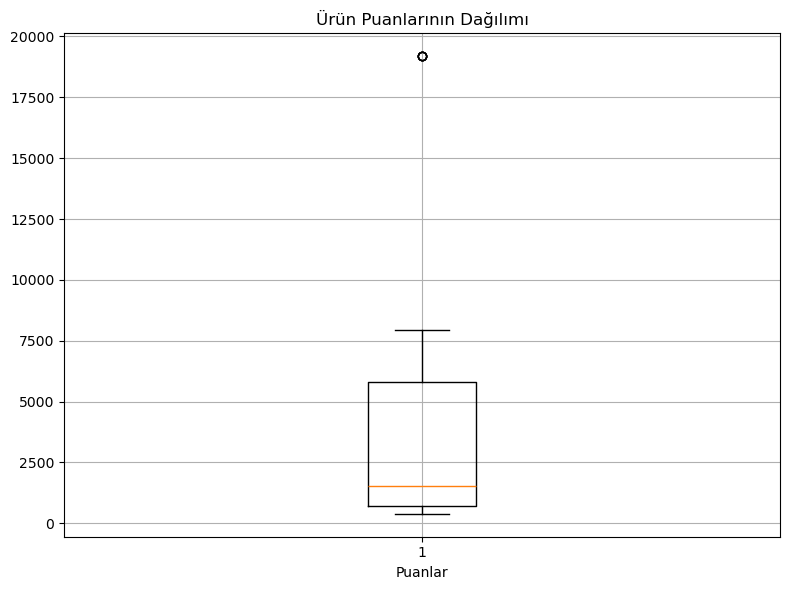

In [51]:
import matplotlib.pyplot as plt



# Kutu grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.boxplot(df_puan)
plt.xlabel('Puanlar')
plt.title('Ürün Puanlarının Dağılımı')
plt.grid(True)
plt.tight_layout()

# Grafik gösterme
plt.show()

In [53]:
# #Korelasyon analizi, iki değişken arasındaki doğrusal ilişkiyi ölçen istatistiksel bir tekniktir. Korelasyon katsayısı, bu ilişkiyi ölçer 
# ve -1 ile 1 arasında bir değer alır. Pozitif bir korelasyon katsayısı, değişkenler arasında pozitif bir ilişki olduğunu gösterirken, negatif bir 
# korelasyon katsayısı ise negatif bir ilişki olduğunu gösterir. 0'a yaklaşan bir korelasyon katsayısı ise iki değişken arasında ilişki olmadığını gösterir.


# DataFrame oluşturma
df = pd.DataFrame({'Puan': puan_listesi, 'Fiyat': fiyat_listesi})

# Korelasyon analizi
korelasyon = df['Puan'].corr(df['Fiyat'])

print("Puanlar ve fiyatlar arasındaki korelasyon katsayısı:", korelasyon)

Puanlar ve fiyatlar arasındaki korelasyon katsayısı: 0.11880718467935364


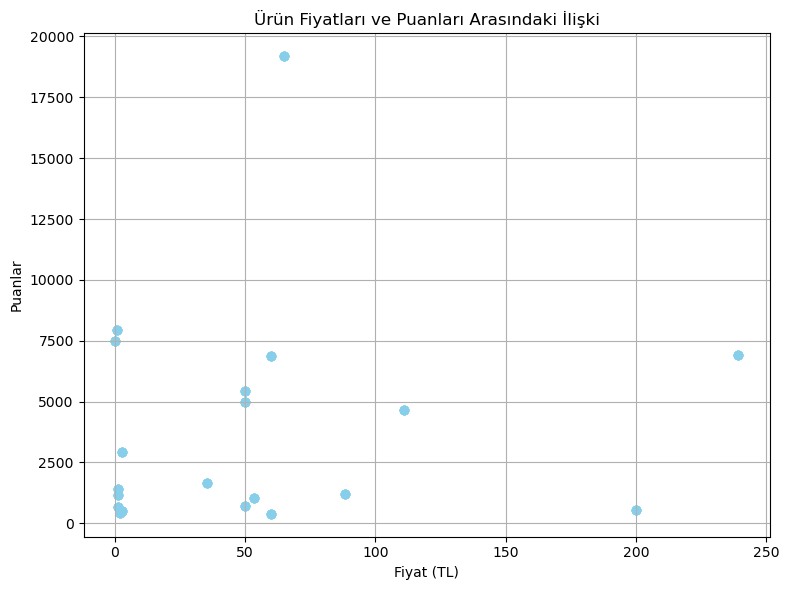

In [55]:
# Scatter plot oluşturma
plt.figure(figsize=(8, 6))
plt.scatter(fiyat_listesi, puan_listesi, color='skyblue')
plt.xlabel('Fiyat (TL)')
plt.ylabel('Puanlar')
plt.title('Ürün Fiyatları ve Puanları Arasındaki İlişki')
plt.grid(True)
plt.tight_layout()

# Grafik gösterme
plt.show()

# Fiyatlar ile puanlar arasındaki ilişkiyi göstermek için bir scatter plot oluşturuldu. Her bir nokta, bir ürünün fiyatını x ekseni ve puanını
# y ekseni olarak gösterir. Eğer fiyatlar ile puanlar arasında bir ilişki varsa, bu scatter plot üzerinde görülebilir. Örneğin, eğer yüksek fiyatlar 
# genellikle yüksek puanlarla ilişkilendiriliyorsa, scatter plot'da yukarı doğru bir eğilim görülebilir. Benzer şekilde, negatif bir ilişki varsa, scatter
# plot'da aşağı doğru bir eğilim görülebilir. Ayrıca, ilişkinin gücü, noktaların ne kadar sıkı bir şekilde bir doğruya yakınsadığını gözlemleyerek
# anlaşılabilir.

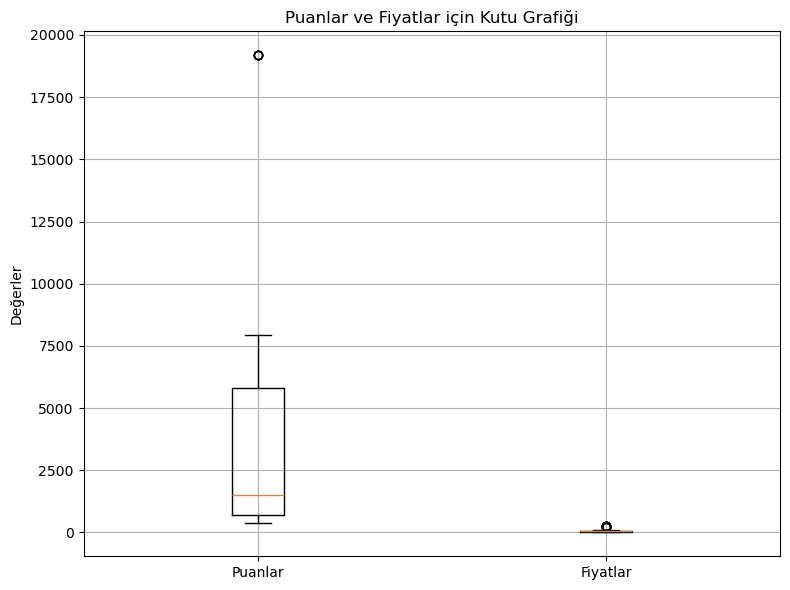

In [56]:
# Kutu grafiği oluşturma
plt.figure(figsize=(8, 6))
plt.boxplot([puan_listesi, fiyat_listesi], labels=['Puanlar', 'Fiyatlar'])
plt.ylabel('Değerler')
plt.title('Puanlar ve Fiyatlar için Kutu Grafiği')
plt.grid(True)
plt.tight_layout()

# Grafik gösterme
plt.show()

# P                                     uanlar ve fiyatlar için ayrı ayrı kutu grafikleri oluşturur. Her bir kutu grafiği, ilgili değişkenin minimum, maksimum, medyan ve 
# çeyrekler arası yayılımını gösterir. Böylece her iki değişkenin dağılımını ve merkezi eğilimini görsel olarak karşılaştırabiliriz.

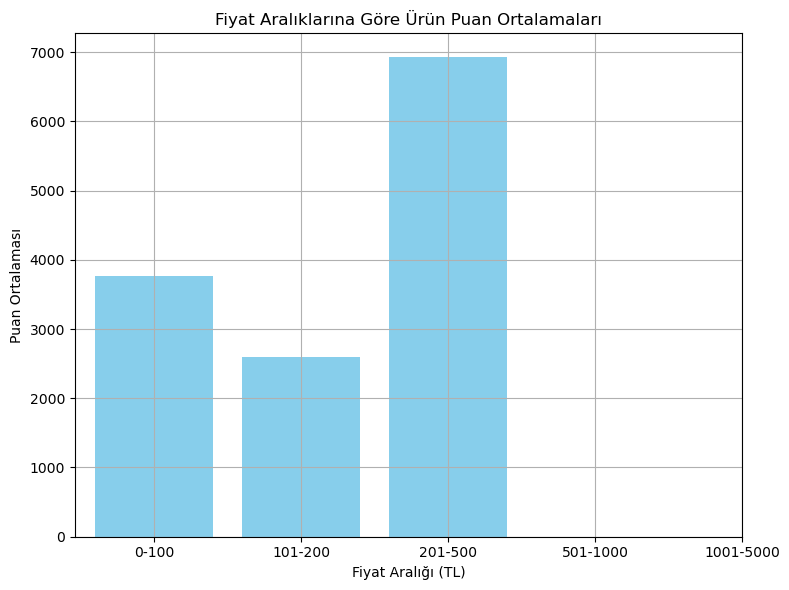

In [58]:
# DataFrame oluşturma
df = pd.DataFrame({'Puan': puan_listesi, 'Fiyat': fiyat_listesi})

# Fiyat aralıklarını tanımlama
fiyat_araliklari = [(0, 100), (101, 200), (201, 500), (501, 1000), (1001, 5000)]  # Güncellenmiş fiyat aralıkları

# Her fiyat aralığı için puanların ortalamasını hesaplama
puan_ortalamalari = []
for fiyat_araligi in fiyat_araliklari:
    alt_sinir, ust_sinir = fiyat_araligi
    filtre = (df['Fiyat'] >= alt_sinir) & (df['Fiyat'] <= ust_sinir)
    puan_ortalamasi = df.loc[filtre, 'Puan'].mean()
    puan_ortalamalari.append(puan_ortalamasi)

# Grafik oluşturma
plt.figure(figsize=(8, 6))
plt.bar(range(len(puan_ortalamalari)), puan_ortalamalari, color='skyblue')
plt.xticks(range(len(fiyat_araliklari)), ['0-100', '101-200', '201-500', '501-1000', '1001-5000'])
plt.xlabel('Fiyat Aralığı (TL)')
plt.ylabel('Puan Ortalaması')
plt.title('Fiyat Aralıklarına Göre Ürün Puan Ortalamaları')
plt.grid(True)
plt.tight_layout()

# Grafik gösterme
plt.show()